## Predict St Lucia Metal Roofs

Using rotated to hz + OpenCv border


In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join
from ipyexperiments import *

In [16]:
torch.cuda.set_device(1)
torch.cuda.current_device()

1

In [17]:
data_dir = Path('data')


In [18]:
MODEL_NAME='result_QC'

In [19]:
NB_NUM='10_0'
RUN='0'

In [20]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: 3fc20e1b, DATE: 20191127


In [21]:
#DATE = '20191124'
#UID = '1328c588'

In [22]:
SUB_NUM='2'

In [23]:
img_size=256
bs=128

In [24]:
train_images=data_dir/f'train/rotated/clipped/{img_size}'
test_images=data_dir/f'test/rotated/clipped/{img_size}'

In [28]:
def gen_df(file_):
    df = pd.read_csv(data_folder/f'{file_}')
    pfix=file_.split('stage-2-')[1]
    df['model']=pfix.split('-')[0]
    print(pfix)
    pfix=pfix.split('10_')[1]
    run=pfix.split('-')[0]
    df['run']=run
    ttype=pfix.split(f'{run}-')[1].split('-')[0]
    df['ttype']=ttype
    df['uid']=file_
    return df

#### concat predictions

In [30]:
c_list_ = []
rm_list=[]
region_list=[]
data_folder = data_dir/'processing/1_without_cbs/'
for file_ in os.listdir(data_folder):
    if file_.endswith('.csv'):
        if 'country' in file_:
            c_list_.append(gen_df(file_))
        elif 'roof_material' in file_:
            rm_list.append(gen_df(file_))
        elif 'region' in file_:
            region_list.append(gen_df(file_))
df_sl_c = pd.concat(c_list_)
df_sl_rm = pd.concat(rm_list)
df_sl_region = pd.concat(region_list)

rn152-10_0-country-all_unverified-5-20191126-963df561.csv
rn50-10_1-country-all_unverified-5-20191126-963df561.csv
rn152-10_2-country-all_unverified-5-20191126-963df561.csv
rn50-10_0-roof_material-all_unverified-5-20191126-963df561.csv
rn152-10_0-roof_material-all_unverified-5-20191126-963df561.csv
dn121-10_1-region-all_unverified-5-20191126-963df561.csv
rn152-10_2-roof_material-all_unverified-5-20191126-963df561.csv
dn121-10_2-region-all_unverified-5-20191126-963df561.csv
rn50-10_0-region-all_unverified-5-20191126-963df561.csv
dn121-10_0-country-all_unverified-5-20191126-963df561.csv
rn50-10_1-roof_material-all_unverified-5-20191126-963df561.csv
rn152-10_1-region-all_unverified-5-20191126-963df561.csv
rn50-10_0-country-all_unverified-5-20191126-963df561.csv
dn121-10_1-country-all_unverified-5-20191126-963df561.csv
dn121-10_0-region-all_unverified-5-20191126-963df561.csv
rn50-10_1-region-all_unverified-5-20191126-963df561.csv
dn121-10_1-roof_material-all_unverified-5-20191126-963df561.

In [31]:
df_sl_c.head()

,id,concrete_cement_colombia,concrete_cement_guatemala,concrete_cement_st_lucia,healthy_metal_colombia,healthy_metal_guatemala,healthy_metal_st_lucia,incomplete_colombia,incomplete_st_lucia,irregular_metal_colombia,irregular_metal_guatemala,irregular_metal_st_lucia,other_colombia,other_guatemala,other_st_lucia,model,run,ttype,uid
0,7a24bd7e,0.000255,0.001458,0.000557,0.001196,0.000611,0.976295,0.000176,0.000228,0.000211,0.000957,0.003597,0.000212,0.010743,0.003503,rn152,0,country,stage-2-rn152-10_0-country-all_unverified-5-20...
1,7a2cf00c,0.030975,0.138384,0.004366,0.445674,0.178506,0.077426,0.027265,0.001400,0.043549,0.012433,0.004466,0.012422,0.021961,0.001173,rn152,0,country,stage-2-rn152-10_0-country-all_unverified-5-20...
2,7a3975e8,0.000874,0.000486,0.002189,0.025555,0.000669,0.955983,0.000497,0.000377,0.006324,0.000901,0.004304,0.000292,0.000301,0.001247,rn152,0,country,stage-2-rn152-10_0-country-all_unverified-5-20...
3,7a1d215e,0.000390,0.001031,0.000511,0.003794,0.000799,0.973295,0.000389,0.000270,0.001788,0.001009,0.004861,0.000395,0.003032,0.008436,rn152,0,country,stage-2-rn152-10_0-country-all_unverified-5-20...
4,7a42475e,0.002462,0.008615,0.002593,0.026376,0.003182,0.889495,0.001332,0.000771,0.001573,0.002933,0.007225,0.000827,0.047511,0.005106,rn152,0,country,stage-2-rn152-10_0-country-all_unverified-5-20...


In [32]:
df_sl_rm.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other,model,run,ttype,uid
0,7a24bd7e,0.011275,0.972013,0.003838,0.002410,0.010464,rn50,0,roof_material,stage-2-rn50-10_0-roof_material-all_unverified...
1,7a2cf00c,0.041988,0.882759,0.019981,0.024608,0.030664,rn50,0,roof_material,stage-2-rn50-10_0-roof_material-all_unverified...
2,7a3975e8,0.006911,0.934357,0.004743,0.049240,0.004749,rn50,0,roof_material,stage-2-rn50-10_0-roof_material-all_unverified...
3,7a1d215e,0.010473,0.892539,0.012409,0.072682,0.011897,rn50,0,roof_material,stage-2-rn50-10_0-roof_material-all_unverified...
4,7a42475e,0.076069,0.877610,0.006475,0.005844,0.034001,rn50,0,roof_material,stage-2-rn50-10_0-roof_material-all_unverified...


In [14]:
def get_all_model_type_runs(model, ttype, runs):
    df = df_sl_metal.loc[(df_sl_metal['model'] == model) & (df_sl_metal['ttype']== ttype)& df_sl_metal['run'].isin(runs)]
    df=df[['healthy_metal','irregular_metal']]
    classes=df.idxmax(axis=1)
    df['roof_material']=classes
    return df

In [15]:
def get_all_model_type(model, ttype):
    df = df_sl_metal.loc[(df_sl_metal['model'] == model) & (df_sl_metal['ttype'])]
    df=df[['healthy_metal','irregular_metal']]
    classes=df.idxmax(axis=1)
    df['roof_material']=classes
    return df

In [16]:
def print_lengths(ls):
    for l in ls:
        print(len(l))

In [17]:
def plot_df_types(df1, df2, df3):
    ax = df1.roof_material.value_counts().plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.2)
    ax1 = df2.roof_material.value_counts().plot(kind='bar', color='green', width=.5, legend=True, alpha=0.2)
    df3.roof_material.value_counts().plot(kind='bar', color='maroon', width=.25, alpha=0.5, legend=True)

In [18]:
df_binary_rn50 = get_all_model_type('rn50', 'binary')
df_region_rn50 = get_all_model_type('rn50', 'region')
df_country_rn50 = get_all_model_type('rn50', 'country')

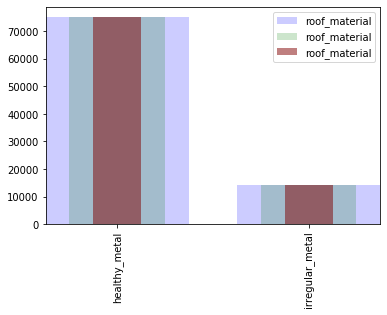

In [19]:
plot_df_types(df_binary_rn50, df_region_rn50, df_country_rn50)

In [20]:
df_binary_rn50.head()

,healthy_metal,irregular_metal,roof_material
0,0.985315,0.014685,healthy_metal
1,0.921417,0.078583,healthy_metal
2,0.991036,0.008964,healthy_metal
3,0.971268,0.028732,healthy_metal
4,0.978127,0.021873,healthy_metal


In [21]:
print_lengths([df_binary_rn50, df_region_rn50, df_country_rn50])

89232
89232
89232


In [22]:
df_binary_rn152 = get_all_model_type('rn152', 'binary')
df_region_rn152 = get_all_model_type('rn152', 'region')
df_country_rn152 = get_all_model_type('rn152', 'country')

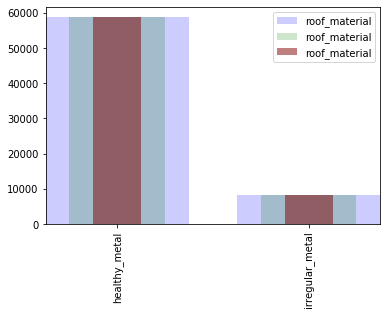

In [23]:
plot_df_types(df_binary_rn152, df_region_rn152, df_country_rn152)

In [24]:
print_lengths([df_binary_rn152, df_region_rn152, df_country_rn152])

66924
66924
66924


In [25]:
df_binary_dn121 = get_all_model_type('dn121', 'binary')
df_region_dn121 = get_all_model_type('dn121', 'region')
df_country_dn121 = get_all_model_type('dn121', 'country')

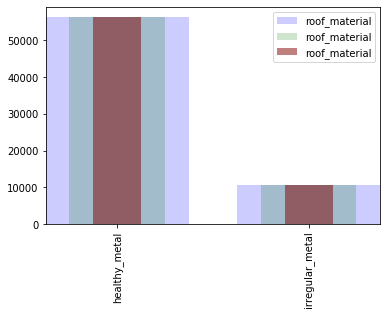

In [26]:
plot_df_types(df_binary_dn121, df_region_dn121, df_country_dn121)

In [27]:
print_lengths([df_binary_dn121, df_region_dn121, df_country_dn121])

66924
66924
66924


In [28]:
#### Healthy metal

In [29]:
df_hm=df_sl_metal[['id','healthy_metal']]

In [30]:
len(df_hm)

223080

In [31]:
result = df_hm.groupby(['id'], as_index=False).agg(
                     ['mean', 'std'])

In [32]:
len(result)

7436

In [33]:
result.head()

healthy_metal          
                  mean       std
id                              
7a1c5026      0.884546  0.136252
7a1c50f8      0.778770  0.204084
7a1c53c8      0.148015  0.119596
7a1c5a6c      0.670838  0.228117
7a1c5b2a      0.979686  0.027731

Sort by tuple

In [34]:
result.sort_values(by=('healthy_metal','std'),ascending=False).head()

healthy_metal          
                  mean       std
id                              
7a2f9d52      0.370079  0.335969
7a241f2c      0.530109  0.335768
7a3bf48a      0.508731  0.334071
7a22d43c      0.586963  0.332094
7a3ce958      0.498415  0.329622

Or drop header

In [35]:
result.columns = result.columns.droplevel(0)

In [36]:
result.head()

,mean,std
id,,
7a1c5026,0.884546,0.136252
7a1c50f8,0.778770,0.204084
7a1c53c8,0.148015,0.119596
7a1c5a6c,0.670838,0.228117
7a1c5b2a,0.979686,0.027731


In [37]:
result=result.sort_values(by=('std'),ascending=False).reset_index()

In [38]:
result.head()

,id,mean,std
0,7a2f9d52,0.370079,0.335969
1,7a241f2c,0.530109,0.335768
2,7a3bf48a,0.508731,0.334071
3,7a22d43c,0.586963,0.332094
4,7a3ce958,0.498415,0.329622


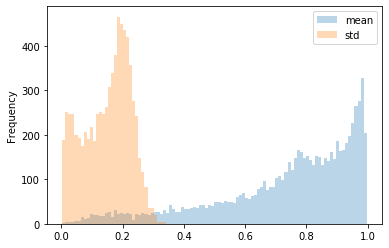

In [39]:
result.plot.hist(bins=100, alpha=0.3)

Try as first pass using 0.8 mean as cutoff

In [40]:
hm_10pct_stddev=result.loc[result['std'] <= 0.1]
hm_20pct_stddev=result.loc[result['std'] <= 0.2]

In [41]:
hm_80pct_plus=result.loc[result['mean'] >= 0.8]
hm_70pct_plus=result.loc[result['mean'] >= 0.7]

In [42]:
len(hm_80pct_plus)/len(result)

0.4854760623991393

#### Irregular metal

In [43]:
df_im=df_sl_metal[['id','irregular_metal']]

In [44]:
result_im = df_im.groupby(['id'], as_index=False).agg(
                     ['mean', 'std'])

In [45]:
result_im.columns = result_im.columns.droplevel(0)

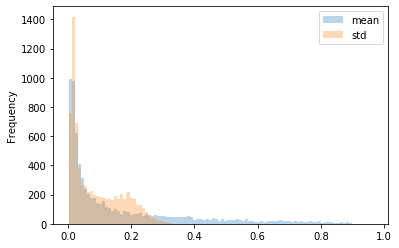

In [46]:
result_im.plot.hist(bins=100, alpha=0.3)

In [47]:
im_10pct_stddev=result_im.loc[result_im['std'] <= 0.1]
im_20pct_stddev=result_im.loc[result_im['std'] <= 0.2]

In [48]:
im_80pct_plus=result_im.loc[result_im['mean'] >= 0.8]
im_70pct_plus=result_im.loc[result_im['mean'] >= 0.7]

In [49]:
len(im_80pct_plus)/len(result_im)

0.013044647660032275

#### Save these as 'silver' validated

In [50]:
im_10pct_stddev['roof_type']= 'irregular_metal'
im_20pct_stddev['roof_type']= 'irregular_metal'

hm_10pct_stddev['roof_type']= 'healthy_metal'
hm_20pct_stddev['roof_type']= 'healthy_metal'

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [51]:
im_80pct_plus['roof_type']= 'irregular_metal'
hm_80pct_plus['roof_type']= 'healthy_metal'

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
im_70pct_plus['roof_type']= 'irregular_metal'
hm_70pct_plus['roof_type']= 'healthy_metal'

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
im_80pct_plus.head()

,mean,std,roof_type
id,,,
7a1cb3f4,0.824388,0.182925,irregular_metal
7a1d17fe,0.809232,0.115739,irregular_metal
7a1d9f94,0.827946,0.134827,irregular_metal
7a1d9ff8,0.865371,0.104539,irregular_metal
7a1de86e,0.847497,0.144340,irregular_metal


In [54]:
im_80pct_plus.drop(columns=['mean','std'],inplace=True)
hm_80pct_plus.drop(columns=['mean','std'],inplace=True)
im_70pct_plus.drop(columns=['mean','std'],inplace=True)
hm_70pct_plus.drop(columns=['mean','std'],inplace=True)

im_10pct_stddev.drop(columns=['mean','std'],inplace=True)
im_20pct_stddev.drop(columns=['mean','std'],inplace=True)
hm_10pct_stddev.drop(columns=['mean','std'],inplace=True)
hm_20pct_stddev.drop(columns=['mean','std'],inplace=True)

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
silver_val_80pct_rooftypes=im_80pct_plus.append(hm_80pct_plus).reset_index()
silver_val_70pct_rooftypes=im_70pct_plus.append(hm_70pct_plus).reset_index()

silver_val_10pct_std_rooftypes=im_10pct_stddev.append(hm_10pct_stddev).reset_index()
silver_val_20pct_std_rooftypes=im_20pct_stddev.append(hm_20pct_stddev).reset_index()

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [56]:
silver_val_80pct_rooftypes = silver_val_80pct_rooftypes.rename(columns={'index': 'id', 'id': 'drop'})
silver_val_70pct_rooftypes = silver_val_70pct_rooftypes.rename(columns={'index': 'id', 'id': 'drop'})

silver_val_10pct_std_rooftypes=silver_val_10pct_std_rooftypes.rename(columns={'index': 'id', 'id': 'drop'})
silver_val_20pct_std_rooftypes=silver_val_20pct_std_rooftypes.rename(columns={'index': 'id', 'id': 'drop'})

In [57]:
silver_val_80pct_rooftypes.drop(columns=['drop'],inplace=True)
silver_val_70pct_rooftypes.drop(columns=['drop'],inplace=True)

silver_val_10pct_std_rooftypes.drop(columns=['drop'],inplace=True)
silver_val_20pct_std_rooftypes.drop(columns=['drop'],inplace=True)

In [58]:
len(silver_val_80pct_rooftypes)

3707

In [59]:
len(silver_val_70pct_rooftypes)

5210

these should not be > dataset length, dont use for now

In [60]:
len(silver_val_10pct_std_rooftypes)

6688

In [61]:
len(silver_val_20pct_std_rooftypes)

11684

In [62]:
len(df_sl_metal)

223080

In [63]:
silver_val_80pct_rooftypes.to_csv(data_dir/'st_lucia_80pct_silver_healthy_irregular_metal.csv', index=False)
silver_val_70pct_rooftypes.to_csv(data_dir/'st_lucia_70pct_silver_healthy_irregular_metal.csv', index=False)

#silver_val_10pct_std_rooftypes.to_csv(data_dir/'st_lucia_silver_10pct_std_dev_healthy_irregular_metal.csv', index=False)
#silver_val_20pct_std_rooftypes.to_csv(data_dir/'st_lucia_silver_20pct_std_dev_healthy_irregular_metal.csv', index=False)

In [64]:
### all pred helthy

In [65]:
all_h = df_hm.groupby(['id'], as_index=False).agg(
                     ['count', 'sum'])

In [66]:
all_h.head()

healthy_metal           
                 count        sum
id                               
7a1c5026            30  26.536383
7a1c50f8            30  23.363106
7a1c53c8            30   4.440451
7a1c5a6c            30  20.125147
7a1c5b2a            30  29.390566

In [67]:
df_hm.head()

,id,healthy_metal
0,7a24bd7e,0.989721
1,7a2cf00c,0.256781
2,7a3975e8,0.910410
3,7a1d215e,0.996734
4,7a42475e,0.832023


In [68]:
df_sl_metal.head()

,id,healthy_metal,irregular_metal,model,run,ttype,uid
0,7a24bd7e,0.989721,0.002138,rn152,1,region,stage-2-rn152-10_metal-only_1-region-5-2019112...
1,7a2cf00c,0.256781,0.178513,rn152,1,region,stage-2-rn152-10_metal-only_1-region-5-2019112...
2,7a3975e8,0.910410,0.014232,rn152,1,region,stage-2-rn152-10_metal-only_1-region-5-2019112...
3,7a1d215e,0.996734,0.001772,rn152,1,region,stage-2-rn152-10_metal-only_1-region-5-2019112...
4,7a42475e,0.832023,0.008941,rn152,1,region,stage-2-rn152-10_metal-only_1-region-5-2019112...


In [69]:
df=df_sl_metal[['healthy_metal','irregular_metal']]
classes=df.idxmax(axis=1)
df['roof_material']=classes

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
df['id']=df_sl_metal['id']

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df.drop(columns=['healthy_metal','irregular_metal'],inplace=True)

In [72]:
df.head()

,roof_material,id
0,healthy_metal,7a24bd7e
1,healthy_metal,7a2cf00c
2,healthy_metal,7a3975e8
3,healthy_metal,7a1d215e
4,healthy_metal,7a42475e


In [73]:

df=df.replace('healthy_metal', 1)
df=df.replace('irregular_metal', 0)

In [74]:
all_m = df.groupby(['id'], as_index=False).agg(
                     ['count', 'sum'])

In [75]:
all_m.head()

roof_material    
                 count sum
id                        
7a1c5026            30  30
7a1c50f8            30  30
7a1c53c8            30   0
7a1c5a6c            30  26
7a1c5b2a            30  30

In [76]:
all_m.columns = all_m.columns.droplevel(0)

In [77]:
all_models_irregualr_metal=all_m.loc[all_m['sum'] == 0]

In [78]:
all_models_irregualr_metal.head()

,count,sum
id,,
7a1c53c8,30,0
7a1cb3f4,30,0
7a1cecde,30,0
7a1d17fe,30,0
7a1d4256,30,0


In [79]:
all_models_healthy_metal=all_m.loc[all_m['sum'] == 30]

In [80]:
len(all_models_irregualr_metal)

157

In [81]:
len(all_models_healthy_metal)

4499

In [82]:
all_models_irregualr_metal.head()

,count,sum
id,,
7a1c53c8,30,0
7a1cb3f4,30,0
7a1cecde,30,0
7a1d17fe,30,0
7a1d4256,30,0


In [83]:
all_models_irregualr_metal.to_csv(data_dir/'st_lucia_all_res_dense_models_irregular_metal.csv')
all_models_healthy_metal.to_csv(data_dir/'st_lucia_all_res_dense_models_healthy_metal.csv')